## **Final Project** ##

In [1]:
import pandas as pd
import numpy as np
import math as math
import sys
import matplotlib.pyplot as plt

### **Police Incident** ### 

When anyone looking into a prospective neighborhood, look at the crime rate. Even Though crimes are frequently intense in big cities, it doesn’t imply the neighborhood is certainly safe even if it’s in a small town. 
Crime statistics are usually good indicators of neighborhood safety and safety is one of the essential indicators of a best neighborhood. But it’s not always easy to spot crime. Your quality of life can depend on your neighborhood.

In [2]:
police_incident = pd.read_csv("Police_Incident_Blotter.csv") 

In [3]:

## List all neighborhoods
neighbourhoods = police_incident['INCIDENTNEIGHBORHOOD'].unique()
print(neighbourhoods)

['Brookline' 'North Oakland' 'Sheraden' 'Bloomfield'
 'Central Business District' 'East Liberty' 'Overbrook' 'Perry South'
 'Carrick' 'Larimer' 'East Hills' 'Lincoln-Lemington-Belmar'
 'South Side Flats' 'Shadyside' 'Central North Side' 'Arlington'
 'Stanton Heights' 'Mount Washington' 'Greenfield' 'Crafton Heights'
 'Homewood South' 'Bluff' 'East Allegheny' 'Allentown'
 'Marshall-Shadeland' 'Central Lawrenceville' 'North Shore' 'Friendship'
 'New Homestead' 'South Side Slopes' 'Northview Heights'
 'Crawford-Roberts' 'Windgap' 'Beechview' 'Brighton Heights' 'Knoxville'
 'Outside State' 'Lincoln Place' 'Middle Hill' 'Homewood West'
 'Central Oakland' 'Manchester' 'Outside City' 'Point Breeze'
 'Regent Square' 'Duquesne Heights' 'Perry North' 'Troy Hill'
 'Strip District' 'Highland Park' 'Upper Hill' 'Allegheny Center'
 'Banksville' 'Hazelwood' 'Polish Hill' 'Chateau' 'Homewood North'
 'Garfield' 'West Oakland' 'Glen Hazel' 'Bon Air' 'Upper Lawrenceville'
 'Spring Hill-City View' 'Bedfor

In [20]:
police_incident.head(3)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,247582194,21045028,0,2021-03-17T14:57:00,"Brookline Blvd & Witt St Pittsburgh, PA 15226",Y,Brookline,6,99,1501 Drivers Required to be Licensed. / 1786 R...,3206.0,4.0,5.0,-80.005904,40.392418
1,247583239,21045077,27,2021-03-17T16:10:00,"Forbes Ave & S Dithridge St Pittsburgh, PA 15213",N,North Oakland,4,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,404.0,8.0,3.0,-79.950226,40.444052
2,247595750,21045154,10,2021-03-17T17:56:00,"3100 Block Huxley St Pittsburgh, PA 15204",Y,Sheraden,6,SIMPLE ASSAULT,2701 Simple Assault.,2022.0,2.0,5.0,-80.062087,40.453472


In [7]:
len(police_incident['INCIDENTNEIGHBORHOOD'].unique())

95

**There are anout 95 incident types reported in the documents.**

In [21]:
incident_types = police_incident['INCIDENTHIERARCHYDESC'].unique()

print(len(police_incident['INCIDENTNEIGHBORHOOD'].unique()))

print(incident_types)

95
['99' 'HIT AND RUN' 'SIMPLE ASSAULT' 'NON-VIOLENT DOMESTIC'
 'CRIMINAL TRESPASS' 'AIDED CASE'
 'DUI - HIGHEST RATE OF ALCOHOL - BAC >= .16%' 'FOUND PROPERTY'
 'THEFT FROM AUTO' 'GAMBLING INVESTIGATION' 'THEFT' 'STOLEN PROPERTY'
 'HARRASSMENT/THREAT/ATTEMPT/PHY' 'DOG BITE' 'CRIM MISCHIEF'
 'THEFT BY DECEPTION' 'IDENTITY THEFT' 'RETAIL THEFT (SHOPLIFTING)'
 'BURGLARY' 'TERRORISTIC THREATS' 'DISORDERLY CONDUCT'
 'MISCELLANEOUS FIRE OTHER INVEST CONTINUED' 'PUBLIC DRUNKENESS'
 'AGG-ASSAULT' 'FIRES (SELF STARTING)' 'AGRICULTURAL VANDALISM'
 'STOLEN PROPERTY - OTHER' 'CRIM MISCHIEF (GRAFFITI)' 'HARRASSMENT'
 'DEAD ON ARRIVAL (DOA)' 'RUNAWAYS - JUVENILE'
 'BENCH WARRANT ARREST - NO TIE' 'DUI - GENERAL IMPAIRMENT'
 'MENTAL 201/302' 'ROBBERY OF MOTOR VEHICLE' 'RETSIL THEFT (SHOPLIFTING)'
 'ROBBERY' 'RECEIVING STOLEN PROPERTY' 'FOUND DRUGS' 'DRUG INVESTIGATION'
 'UNAUTHORIZED USE VEHICLE' 'MISSING PERSONS (18+)' 'ACCIDENTAL FIRE'
 'CREDIT CARDS' 'CRIMINAL MISCHIEF' 'MISCELLANEOUS INVESTIGATIO

*Now, there are some informations that are not going to be usefull, so let's narrow our data*

In [4]:
new_df = police_incident[police_incident.columns.difference(['PK', 'CCR' , 'X' , 'Y','CLEAREDFLAG','INCIDENTZONE', 'INCIDENTLOCATION', 'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION'])]

In [23]:
new_df.groupby("INCIDENTNEIGHBORHOOD").count().head(5)

,HIERARCHY,INCIDENTHIERARCHYDESC,INCIDENTTIME,INCIDENTTRACT,OFFENSES
INCIDENTNEIGHBORHOOD,,,,,
Allegheny Center,22,22,22,22,22
Allegheny West,2,2,2,2,2
Allentown,71,71,71,71,71
Arlington,30,30,30,30,30
Arlington Heights,3,3,3,3,3


In [5]:
new_df.groupby("INCIDENTNEIGHBORHOOD").count().loc[:,"OFFENSES"][87:]

INCIDENTNEIGHBORHOOD
Troy Hill              22
Upper Hill             13
Upper Lawrenceville    16
West End               13
West Oakland           15
Westwood                9
Windgap                 7
Name: OFFENSES, dtype: int64

In [6]:
new_df = new_df.sort_values(by=['INCIDENTNEIGHBORHOOD']).dropna()

**let us sort the data by NEIGHBORHOOD and drop rows or columns which contain missing values**

In [7]:
INCIDENTNEIGHBORHOOD_count= new_df['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True)
INCIDENTNEIGHBORHOOD_count = INCIDENTNEIGHBORHOOD_count[:50]

In [26]:
print(INCIDENTNEIGHBORHOOD_count)

Mt. Oliver Boro           1
Allegheny West            2
Outside County            2
Summer Hill               2
Mount Oliver              2
St. Clair                 3
Arlington Heights         3
Hays                      3
Fairywood                 3
Ridgemont                 4
Regent Square             4
Outside State             4
Glen Hazel                5
Swisshelm Park            5
Chartiers City            5
Esplen                    5
East Carnegie             6
Windgap                   7
Oakwood                   9
Westwood                  9
Friendship               10
Spring Garden            11
Terrace Village          11
South Shore              12
Polish Hill              12
Bon Air                  12
West End                 13
Upper Hill               13
Duquesne Heights         14
Outside City             14
Lower Lawrenceville      15
West Oakland             15
Banksville               15
New Homestead            15
Morningside              16
Point Breeze North  

**The safest NEIGHBORHOOD is the one with the lowest crime incident.**

**Let us graph the the crime incident.**

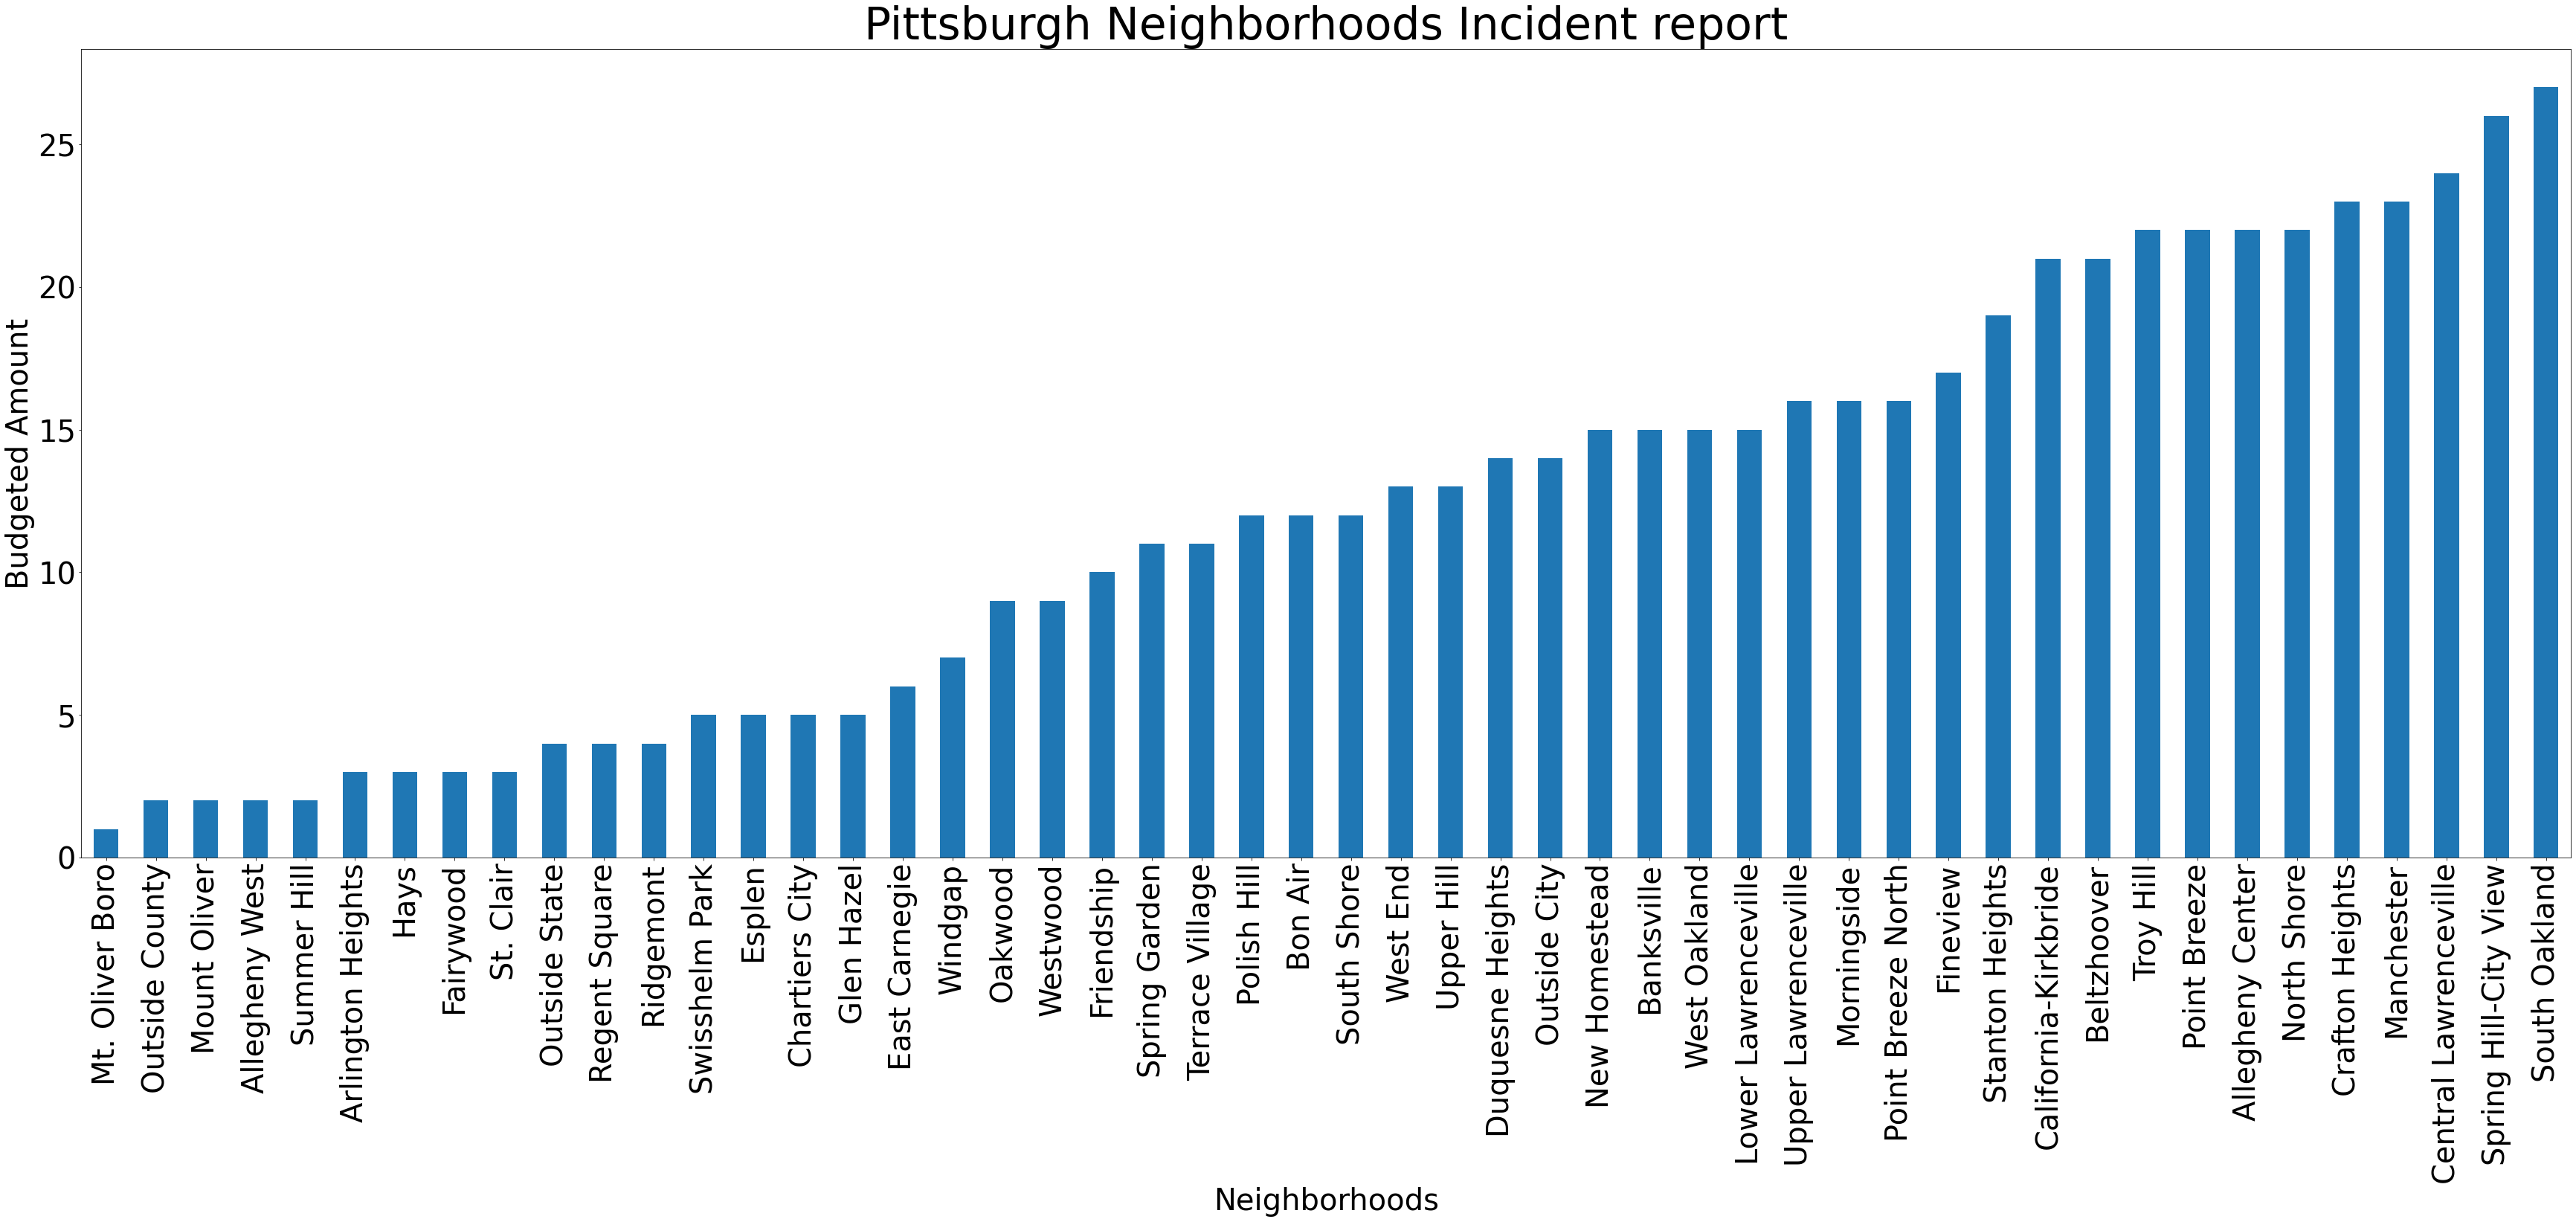

In [14]:
pd.Series(INCIDENTNEIGHBORHOOD_count).plot.bar()
pd.Series(INCIDENTNEIGHBORHOOD_count).plot(x = 'neighborhood', y = 'Incident count', kind = 'bar')
plt.title('Pittsburgh Neighborhoods Incident report', size = 60)
plt.xlabel('Neighborhoods', size = 40)
plt.ylabel('Budgeted Amount', size = 40)
plt.rcParams["figure.figsize"] = (60,20)
plt.rc('xtick', labelsize=40)
plt.rc('ytick', labelsize=40)
plt.show()

**The safest NEIGHBORHOOD is the one with the lowest crime incident and it is Mt. Oliver Boro**